In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# This will reload imports before executing code, allowing you to easily change contents of custom scripts
%load_ext autoreload
%autoreload 2

# Quick-box classification

See `./README.md` for some details

In [3]:
import numpy as np
import pandas as pd

In [4]:
import os, sys
sys.path.append('/home/sandm/Notebooks/stay_classification/src/')

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, 10)]

from random import shuffle
shuffle(colors)

# Synthetic data

In [9]:
from synthetic_data.plotting import plot_trajectory

In [10]:
from matplotlib.ticker import MultipleLocator

In [83]:
from synthetic_data.trajectory import get_stay_segs, get_adjusted_stays
from synthetic_data.trajectory_class import get_rand_traj

event_frac = 0.03 #rand_range(1,0.01,0.001)[0]
duplicate_frac = 0.0 #rand_range(1,0.3,0.05)[0]

configs = {
    'time_thresh':1/6,
    'dist_thresh':0.5,
    'event_frac':event_frac,
    'duplicate_frac':duplicate_frac,    
    'noise_min':0.02,
    'noise_max':0.15
}

In [84]:
time_arr, raw_arr, noise_arr, segments = get_rand_traj(configs)
t_segs, x_segs = get_stay_segs(get_adjusted_stays(segments, time_arr))

In [275]:
from synthetic_data.trajectory_class import pickle_trajectory        
from datetime import datetime
date_tag = datetime.today().strftime('%Y%m%d')

data_dir = f"./"
path_to_file = data_dir + f"trajectory_{date_tag}__use_segments"

In [277]:
try:
    os.makedirs(data_dir)
except OSError as e:
    print(e)
pickle_trajectory(time_arr, raw_arr, noise_arr, segments, path_to_file + ".pkl")

[Errno 17] File exists: './'


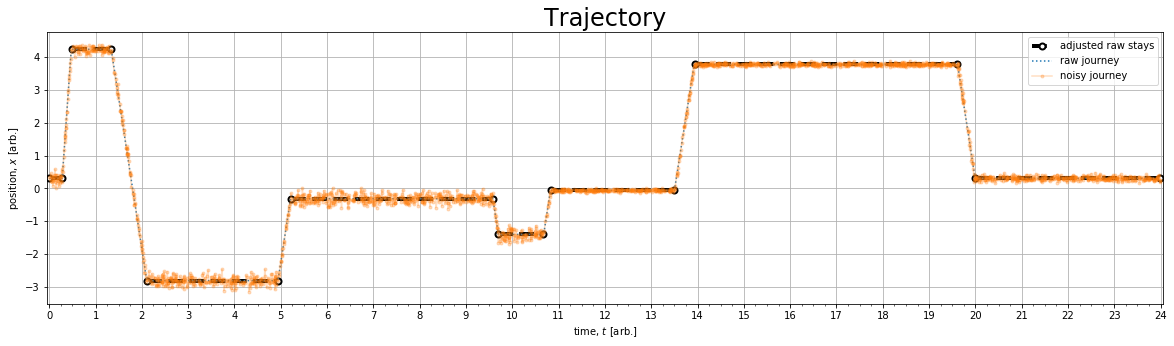

In [85]:
ax = plot_trajectory(time_arr, raw_arr, noise_arr, t_segs, x_segs, configs['dist_thresh']);
ax.xaxis.set_major_locator(MultipleLocator(1.0))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))

In [278]:
from synthetic_data.trajectory_class import get_trajectory

In [281]:
stays = [seg for seg in segments if seg['type']=='stay']

In [303]:
dsec = 1/3600.0
t_total = np.arange(0,24,dsec)

event_frac = 0.005 #rand_range(1,0.01,0.001)[0]
duplicate_frac = 0.0 #rand_range(1,0.3,0.05)[0]

configs = {
    'time_thresh':time_thresh,
    'dist_thresh':dist_thresh*2,
    'event_frac':event_frac,
    'duplicate_frac':duplicate_frac,    
    'noise_min':0.02,
    'noise_max':0.15
}

time_arr, raw_arr, noise_arr, segments = get_trajectory(stays, t_total, configs)
t_segs, x_segs = get_stay_segs(get_adjusted_stays(segments, time_arr))

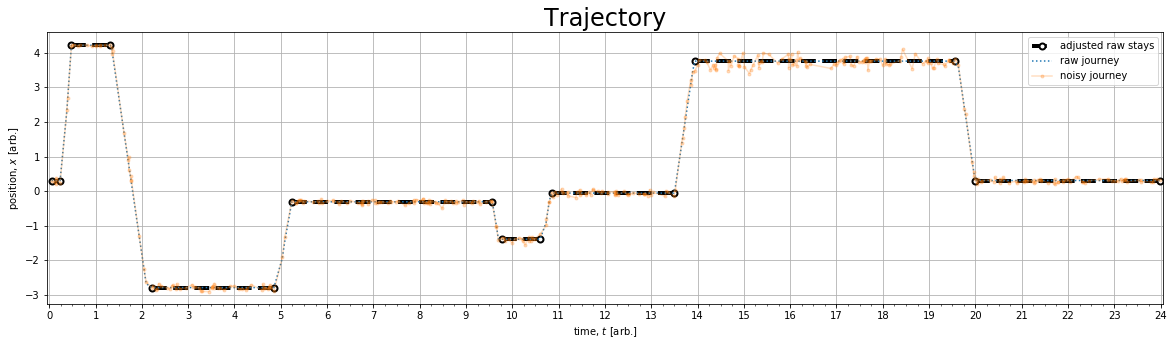

In [304]:
ax = plot_trajectory(time_arr, raw_arr, noise_arr, t_segs, x_segs, configs['dist_thresh']);
ax.xaxis.set_major_locator(MultipleLocator(1.0))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))

# Clustering

## Get intial clusters, separated by a temporal gap

In [286]:
time_thresh = 1/6.
dist_thresh=0.25

In [18]:
from stay_classification.box_classifier.quick_box_classifier import quick_box_method

In [305]:
clusters = quick_box_method(time_arr, noise_arr, dist_thresh, time_thresh, 1, True)

             [    0     7],     1,    0.000  --> too short; 
Cl. Nr.   1: [    8    23],    15,    0.884: append cluster: [    8    22]
             [   22    23],     1,    0.000  --> too short; 
             [   24    30],     3,    0.010  --> too short; 
             [   30    33],     1,    0.000  --> too short; 
Cl. Nr.   2: [   33    70],    37,    2.189: append cluster: [   33    69]
             [   69    70],     1,    0.000  --> too short; 
Cl. Nr.   3: [   70    80],    10,    0.428: append cluster: [   70    79]
             [   79    80],     1,    0.000  --> too short; 
             [   82    87],     4,    0.125  --> too short; 
             [   87    91],     4,    0.086  --> too short; 
Cl. Nr.   4: [   91   104],    13,    0.935: append cluster: [   91   103]
             [  103   104],     1,    0.000  --> too short; 
Cl. Nr.   5: [  104   169],    63,    3.081: append cluster: [  104   166]
             [  166   171],     2,    0.001  --> too short; 
Cl. Nr.   6: [ 

In [227]:
get_box_bounds = lambda sub_arr, dist_thresh: (np.mean(sub_arr), np.mean(sub_arr)+dist_thresh, np.mean(sub_arr)-dist_thresh)

Cl. Nr.   1:     8    22,    14,    0.869
Cl. Nr.   2:    33    69,    36,    2.159
Cl. Nr.   3:    70    79,     9,    0.415
Cl. Nr.   4:    91   103,    12,    0.817
Cl. Nr.   5:   104   166,    62,    3.047
Cl. Nr.   6:   171   186,    15,    0.666
Cl. Nr.   7:   192   199,     7,    0.319
Cl. Nr.   8:   200   235,    35,    1.767
Cl. Nr.   9:   236   241,     5,    0.453
Cl. Nr.  10:   251   261,    10,    0.394
Cl. Nr.  11:   263   281,    16,    0.709
Cl. Nr.  12:   283   301,    18,    0.806
Cl. Nr.  13:   302   335,    33,    1.640
Cl. Nr.  14:   336   338,     2,    0.223
Cl. Nr.  15:   340   359,    18,    0.914
Cl. Nr.  16:   369   409,    40,    2.212
Cl. Nr.  17:   411   422,    11,    0.553
Cl. Nr.  18:   423   425,     2,    0.253
Cl. Nr.  19:   426   430,     4,    0.268


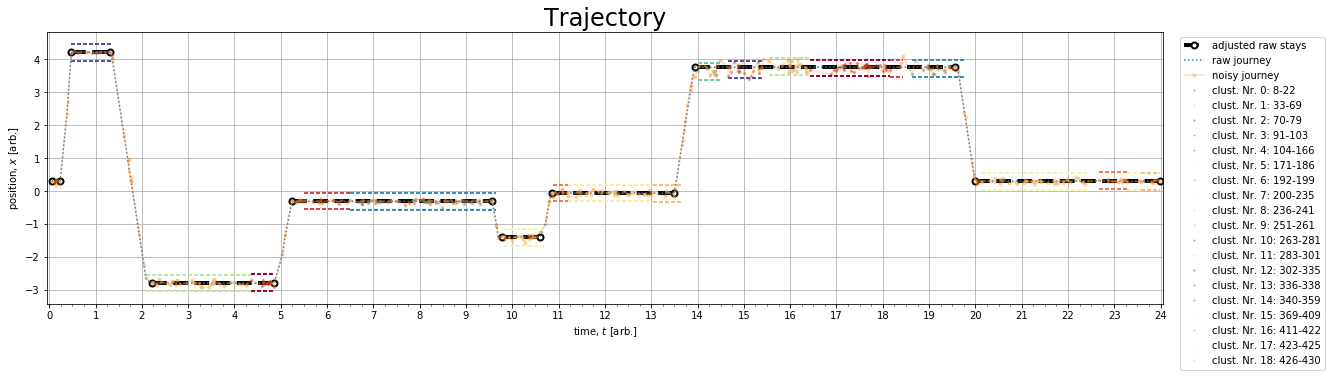

In [306]:
box_lines_dict = {'linestyle':'--','dashes':[2.,1.],'linewidth':2.0}

latest_time_ind = 0 #clusters[0][0]

ax = plot_trajectory(time_arr, raw_arr, noise_arr, t_segs, x_segs, configs['dist_thresh']);

for clust_nr, cluster in enumerate(clusters):

    color=colors[clust_nr%len(colors)]    
    
    # Get the cluster indices
    latest_time_ind = cluster[0]
    new_latest_time_ind = cluster[-1]
    
    # Get the subarrays
    ys =  noise_arr[latest_time_ind:new_latest_time_ind]
    xs = time_arr[latest_time_ind:new_latest_time_ind]
    
    # Get the box
    _, upper, lower = get_box_bounds(ys, dist_thresh)

    lino = f"{latest_time_ind:5d} {new_latest_time_ind:5d}"
    if new_latest_time_ind+1 >= len(time_arr): 
        new_latest_time_ind = len(time_arr)-2
    lino2 = new_latest_time_ind

    t_lines = [time_arr[latest_time_ind],time_arr[new_latest_time_ind+1]]
    ax.plot(t_lines, [lower,lower], color=color, **box_lines_dict)
    ax.plot(t_lines, [lower+2*dist_thresh,lower+2*dist_thresh], color=color, **box_lines_dict)

    event_inds = np.where((ys <= upper) & (ys >= lower))[0]
    
    time_diff = abs(xs[event_inds].max()-xs[event_inds].min())
        
    ax.plot(xs, ys, '.', alpha=0.5, markersize=2, color=color, markerfacecolor="None", label=f'clust. Nr. {clust_nr}: {latest_time_ind}-{new_latest_time_ind}')
    print(f"Cl. Nr. {(clust_nr+1):3d}: {lino}, {event_inds.size:5d}, {time_diff:8.3f}")        
        
ax.xaxis.set_major_locator(MultipleLocator(1.0))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))

plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right', ncol=1);

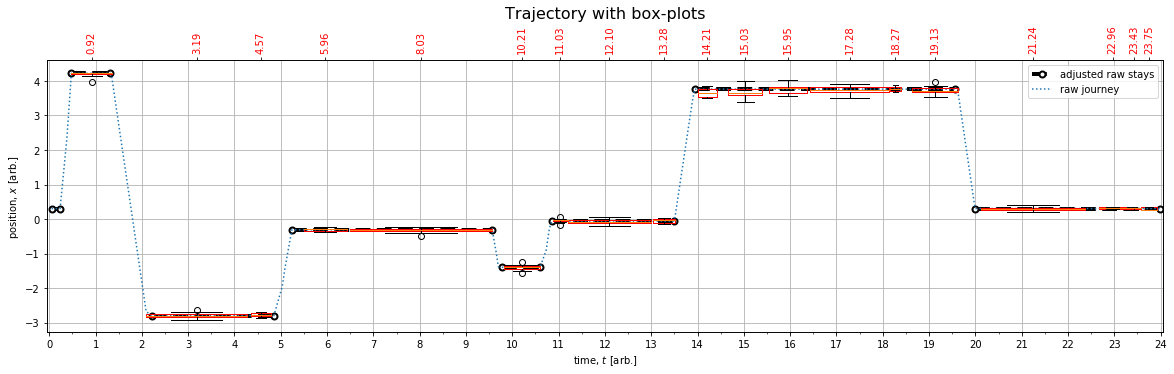

In [307]:
from synthetic_data.plotting import add_plot_trajectory, add_plot_seg_boxes, add_plot_cluster_boxplots
ax = plot_trajectory(time_arr, raw_arr, None, t_segs, x_segs, configs['dist_thresh']);
ax.set_xlim(-0.05,24.05)
#add_plot_seg_boxes(t_segs, x_segs, dist_thresh, ax)
add_plot_cluster_boxplots(time_arr, noise_arr, clusters, dist_thresh, ax)
#ax.set_ylim(ylim);
ax.set_title(f"Trajectory with box-plots", fontsize=16);

## Evaluation

In [297]:
from stay_classification.metrics import eval_synth_data

In [298]:
prec, rec, cmat = eval_synth_data(time_arr, segments, clusters)

print(f"Precision: {prec:5.3f}")
print(f"Recall:    {rec:5.3f}")
print("Confusion matrix:\n", cmat)

Precision: 0.988
Recall:    0.973
Confusion matrix:
 [[ 67   8]
 [ 19 683]]


In [299]:
from stay_classification.metric_box_classifier.metric_box_classifier_gaps import merge_clusters_gen

In [308]:
clusters_2 = merge_clusters_gen(time_arr, noise_arr, clusters, dist_thresh, time_thresh, 3.5, True)

[False, True, False, True, False, False, True, True, False, True, True, True, True, True, False, True, True, True] 
 ['7.011', '0.009', '2.494', '0.018', '1.082', '1.356', '0.036', '0.037', '3.690', '0.001', '0.142', '0.046', '0.028', '0.071', '3.422', '0.041', '0.011', '0.040'] 
 9
[False, True, False, True, False, False, True, True, False, True, True, True, True, False, True, True, True] 
 ['7.011', '0.009', '2.494', '0.018', '1.082', '1.356', '0.036', '0.037', '3.692', '0.142', '0.046', '0.028', '0.071', '3.422', '0.041', '0.011', '0.040'] 
 1
[False, False, True, False, False, True, True, False, True, True, True, True, False, True, True, True] 
 ['7.011', '2.503', '0.018', '1.082', '1.356', '0.036', '0.037', '3.692', '0.142', '0.046', '0.028', '0.071', '3.422', '0.041', '0.011', '0.040'] 
 14
[False, False, True, False, False, True, True, False, True, True, True, True, False, True, True] 
 ['7.011', '2.503', '0.018', '1.082', '1.356', '0.036', '0.037', '3.692', '0.142', '0.046', '0

Cl. Nr.   1:     8    22,    14,    0.869
Cl. Nr.   2:    33    79,    46,    2.681
Cl. Nr.   3:    91   166,    75,    4.042
Cl. Nr.   4:   171   186,    15,    0.666
Cl. Nr.   5:   192   241,    49,    2.617
Cl. Nr.   6:   251   359,   102,    5.549
Cl. Nr.   7:   369   430,    61,    3.734


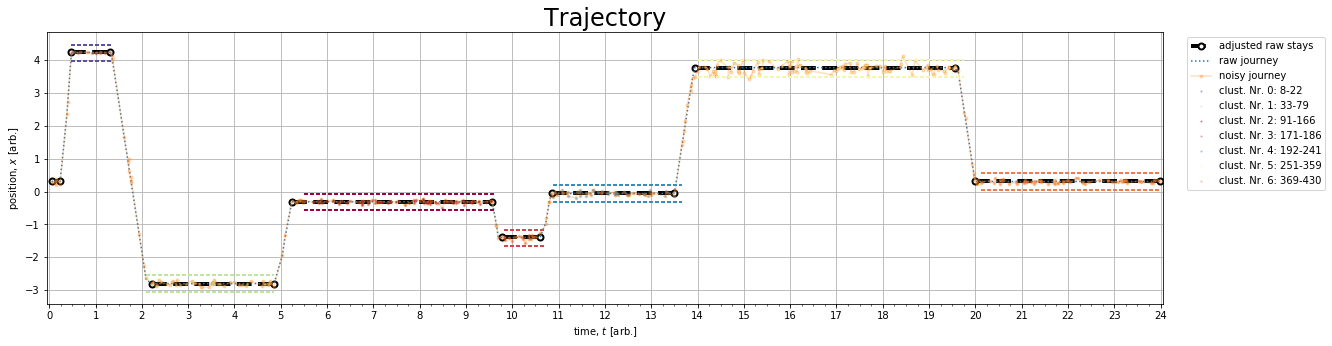

In [309]:
box_lines_dict = {'linestyle':'--','dashes':[2.,1.],'linewidth':2.0}

latest_time_ind = 0 #clusters_2[0][0]

ax = plot_trajectory(time_arr, raw_arr, noise_arr, t_segs, x_segs, configs['dist_thresh']);

for clust_nr, cluster in enumerate(clusters_2):

    color=colors[clust_nr%len(colors)]    
    
    # Get the cluster indices
    latest_time_ind = cluster[0]
    new_latest_time_ind = cluster[-1]
    
    # Get the subarrays
    ys =  noise_arr[latest_time_ind:new_latest_time_ind]
    xs = time_arr[latest_time_ind:new_latest_time_ind]
    
    # Get the box
    _, upper, lower = get_box_bounds(ys, dist_thresh)

    lino = f"{latest_time_ind:5d} {new_latest_time_ind:5d}"
    if new_latest_time_ind+1 >= len(time_arr): 
        new_latest_time_ind = len(time_arr)-2
    lino2 = new_latest_time_ind

    t_lines = [time_arr[latest_time_ind],time_arr[new_latest_time_ind+1]]
    ax.plot(t_lines, [lower,lower], color=color, **box_lines_dict)
    ax.plot(t_lines, [lower+2*dist_thresh,lower+2*dist_thresh], color=color, **box_lines_dict)

    event_inds = np.where((ys <= upper) & (ys >= lower))[0]
    
    time_diff = abs(xs[event_inds].max()-xs[event_inds].min())
        
    ax.plot(xs, ys, '.', alpha=0.5, markersize=2, color=color, markerfacecolor="None", label=f'clust. Nr. {clust_nr}: {latest_time_ind}-{new_latest_time_ind}')
    print(f"Cl. Nr. {(clust_nr+1):3d}: {lino}, {event_inds.size:5d}, {time_diff:8.3f}")        
        
ax.xaxis.set_major_locator(MultipleLocator(1.0))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))

plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right', ncol=1);

Cl. Nr.   1:     8    22,    14,    0.869
Cl. Nr.   2:    33    79,    46,    2.681
Cl. Nr.   3:    91   166,    75,    4.042
Cl. Nr.   4:   171   186,    15,    0.666
Cl. Nr.   5:   192   241,    49,    2.617
Cl. Nr.   6:   251   359,   102,    5.549
Cl. Nr.   7:   369   430,    61,    3.734


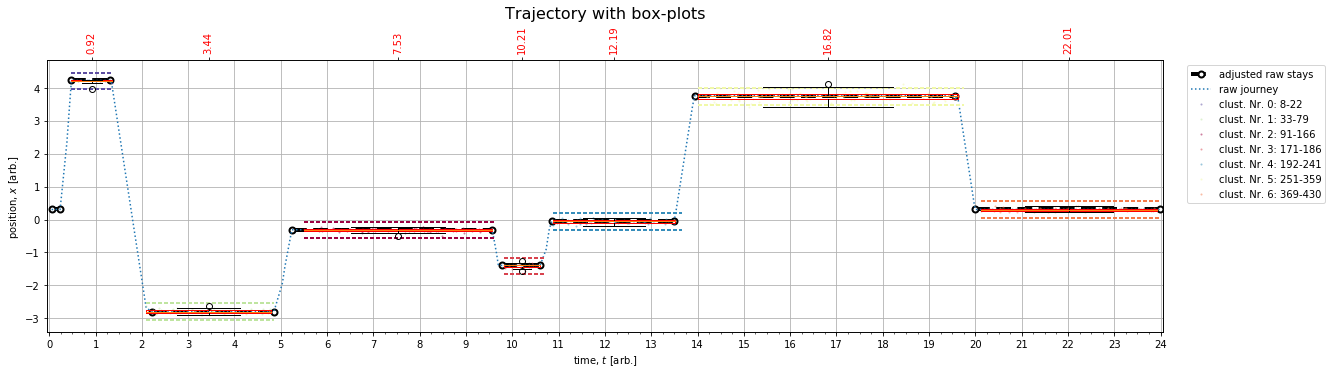

In [333]:
ax = plot_trajectory(time_arr, raw_arr, None, t_segs, x_segs, configs['dist_thresh']);

for clust_nr, cluster in enumerate(clusters_2):

    color=colors[clust_nr%len(colors)]    
    
    # Get the cluster indices
    latest_time_ind = cluster[0]
    new_latest_time_ind = cluster[-1]
    
    # Get the subarrays
    ys =  noise_arr[latest_time_ind:new_latest_time_ind]
    xs = time_arr[latest_time_ind:new_latest_time_ind]
    
    # Get the box
    _, upper, lower = get_box_bounds(ys, dist_thresh)

    lino = f"{latest_time_ind:5d} {new_latest_time_ind:5d}"
    if new_latest_time_ind+1 >= len(time_arr): 
        new_latest_time_ind = len(time_arr)-2
    lino2 = new_latest_time_ind

    t_lines = [time_arr[latest_time_ind],time_arr[new_latest_time_ind+1]]
    ax.plot(t_lines, [lower,lower], color=color, **box_lines_dict)
    ax.plot(t_lines, [lower+2*dist_thresh,lower+2*dist_thresh], color=color, **box_lines_dict)

    event_inds = np.where((ys <= upper) & (ys >= lower))[0]
    
    time_diff = abs(xs[event_inds].max()-xs[event_inds].min())
        
    ax.plot(xs, ys, '.', alpha=0.5, markersize=2, color=color, markerfacecolor="None", label=f'clust. Nr. {clust_nr}: {latest_time_ind}-{new_latest_time_ind}')
    print(f"Cl. Nr. {(clust_nr+1):3d}: {lino}, {event_inds.size:5d}, {time_diff:8.3f}")        
        
ax.xaxis.set_major_locator(MultipleLocator(1.0))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))

plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right', ncol=1);

ax.set_xlim(-0.05,24.05)
#add_plot_seg_boxes(t_segs, x_segs, dist_thresh, ax)
add_plot_cluster_boxplots(time_arr, noise_arr, clusters_2, dist_thresh, ax)
#ax.set_ylim(ylim);
ax.set_title(f"Trajectory with box-plots", fontsize=16);

## Evaluation

### Total scores

In [ ]:
from stay_classification.metrics import get_segments_scores, get_segments_errs

In [302]:
prec, rec, cmat = eval_synth_data(time_arr, segments, clusters_2)

print(f"Precision: {prec:5.3f}")
print(f"Recall:    {rec:5.3f}")
print("Confusion matrix:\n", cmat)

Precision: 0.988
Recall:    0.973
Confusion matrix:
 [[ 67   8]
 [ 19 683]]


### Segment scores

In [373]:
get_segments_scores(time_arr, segments, clusters_2, True);


Comparing 7 pred to 8 true clusters

Cluster   0: [   8,  22]; dur:  0.884, (frac.  0.043)
             [   0,   5], none
             [   8,  20], overlap
             [  34,  80], none
             [  83, 166], none
             [ 170, 186], none
             [ 191, 240], none
             [ 250, 358], none
             [ 365, 431], none

	overlaps with 1 true cluster(s):
          1: [   8,  20]; prec.:  0.867; rec.:  1.000

Cluster   1: [  33,  79]; dur:  2.694, (frac.  0.131)
             [   0,   5], none
             [   8,  20], none
             [  34,  80], overlap
             [  83, 166], none
             [ 170, 186], none
             [ 191, 240], none
             [ 250, 358], none
             [ 365, 431], none

	overlaps with 1 true cluster(s):
          2: [  34,  80]; prec.:  0.979; rec.:  0.979

Cluster   2: [  91, 166]; dur:  4.076, (frac.  0.199)
             [   0,   5], none
             [   8,  20], none
             [  34,  80], none
             [  83, 166],

## Errors

### Segment errors

In [382]:
get_segments_errs(time_arr, segments, clusters_2, True);


Comparing 7 pred to 8 true clusters

Cluster   0: [   8,  22]; dur:  0.884, (frac.  0.043)
             [   0,   5], none
             [   8,  20], overlap
             [  34,  80], none
             [  83, 166], none
             [ 170, 186], none
             [ 191, 240], none
             [ 250, 358], none
             [ 365, 431], none

	Overlap with 1 true cluster(s):
          1; [   8,  20]; err.:  0.005; w-avg. err.:  0.000

Cluster   1: [  33,  79]; dur:  2.694, (frac.  0.131)
             [   0,   5], none
             [   8,  20], none
             [  34,  80], overlap
             [  83, 166], none
             [ 170, 186], none
             [ 191, 240], none
             [ 250, 358], none
             [ 365, 431], none

	Overlap with 1 true cluster(s):
          2; [  34,  80]; err.:  0.005; w-avg. err.:  0.001

Cluster   2: [  91, 166]; dur:  4.076, (frac.  0.199)
             [   0,   5], none
             [   8,  20], none
             [  34,  80], none
             [ 

In [314]:
from stay_classification.metrics import get_pred_labels, get_labels_from_clusters
from synthetic_data.trajectory import get_stay_indices, get_adjusted_stays

In [318]:
true_indices = get_stay_indices(get_adjusted_stays(segments, time_arr), time_arr)
true_labels = np.zeros(time_arr.shape)

for pair in true_indices:
    true_labels[pair[0]:pair[1]+1] = 1

pred_labels = get_pred_labels(clusters_2, time_arr.shape)

In [ ]:
err__labels = abs(true_labels-pred_labels)
err__labels[err__labels == 0] = np.nan

In [326]:
get_err = lambda trues, preds: np.sum(abs(trues-preds))/trues.size
    
pred_labels = get_pred_labels(clusters_2, time_arr.shape)    
print(f"Error: {get_err(true_labels,pred_labels):5.3f} (Acc.: {(1-get_err(true_labels,pred_labels)):5.3f})")

Error: 0.065 (Acc.: 0.935)
